# Regresión lineal múltiple

1. Estaremos trabajando con una base de datos de la NASA donde estaremostrabajando con variables como frecuencia, ángulo, longitud, velocidad, espesor y presión.
   Empezamos importando los datos del archivo .csv e imprimiendo sus dimensiones

In [39]:
# Importamos la librería pandas
import pandas as pd
# Leemos el archivo
data = pd.read_csv("NASA.csv")
# Se imprime en consola las dimensiones de los datos
print(data.shape)
#Se imprimen las 15 filas
print(data.head(15))

(1503, 6)
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500     0.0    0.3048       55.5  

2. Separaremos de forma aleatoría los datos en dos categorías: los de entrenamiento y los de prueba, siendo un 70% de datos para entrenar el modelo y el 30% para validarlo

In [45]:
# Generamos los datos de entrenamiento
train = data.sample(frac=0.7)

# Generamos datos de validación
test = data.drop(train.index)

# Imprimimos las dimensiones de datos de entrenamiento
print("Datos de entrenamiento:",train.shape)

# Imprime dimensiones de datos de prueba
print("Dimensiones de datos de prueba:",test.shape)

#suma de los dos
suma=train.shape[0]+test.shape[0]
print("La suma de las observaciones es:",suma)
print("\nComo vemos la suma de ambas observaciones coincide con el número de observasiones original que medimos en el punto 1")

Datos de entrenamiento: (1052, 6)
Dimensiones de datos de prueba: (451, 6)
La suma de las observaciones es: 1503

Como vemos la suma de ambas observaciones coincide con el número de observasiones original que medimos en el punto 1


3. Estaremos entrenando el modelo de regresión lineal mútiple para predecir sobre la variable de presión sonora detectada

In [46]:
import statsmodels.api as sm
X= train.drop('presion',axis=1)
Y = train.presion
model = sm.OLS(Y,sm.add_constant(X))
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     205.7
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          9.06e-153
Time:                        22:22:38   Log-Likelihood:                -3156.2
No. Observations:                1052   AIC:                             6324.
Df Residuals:                    1046   BIC:                             6354.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.5304      0.656    201.977      0.0

In [43]:
#Al obtener valores de p_value de 0 usaremos la función pvalues para imprimirlos con más exactitud
print(results.pvalues)

const          0.000000e+00
frecuencia    3.181128e-115
angulo         2.082701e-22
longitud       3.757842e-69
velocidad      9.852778e-26
espesor        5.506081e-15
dtype: float64


4.Dado los valores mostrados en el p_value que son menores a 0.5 nos dice que todas las variables son significativas, siendo la frecuencia la más importante del modelo por tener el valor más pequeño, sin embargo al revisar el valor de R^2 (0.496) podemos observar que solo explican alrededor del 50% del modelo ya que puede ser que se estén omitiendo variables importantes para predecir el modelo.
En conclusión, las variables que nos proporcionan son muy significativas pero todavía existen más factores que nos ayudan a explicar nuestro modelo las cuales no se están tomando en cuenta.

5. Estaremos realizando los calculos necesarios para encontrar el valor del residual standard error (RSE) y la 𝑅^2 para los datos de entrenamiento y los de validación

In [50]:
import numpy as np
RSE=np.sqrt(results.scale)
R2= results.rsquared
print("Residual Standar Error de entrenamiento:",RSE)
print("R^2 de entrenamiento: ", R2)

#Separamos las variables independientes eliminando la columna 'presion' y obtenemos las predicciones 
xTest=test.drop('presion',axis="columns")
yHat=results.predict(sm.add_constant(xTest))
yTest=test.presion


RSS_Test=np.sum((yTest-yHat)**2)
TSS_Test = np.sum((yTest-np.mean(yTest))**2)
n=xTest.shape[0] #Observaciones
m=xTest.shape[1] #Variables independientes
RSE_Test = np.sqrt(RSS_Test/(n-m-1))
R2_Test=1-(RSS_Test/TSS_Test)

print("\nResidual Standar Error de prueba:",RSE_Test)
print("R^2 de prueba: ", R2_Test)

Residual Standar Error de entrenamiento: 4.875073338985343
R^2 de entrenamiento:  0.49580936932981623

Residual Standar Error de prueba: 4.714534613494591
R^2 de prueba:  0.5539522698284813


6. Graficaremos los valores reales y predecidos por el modelo de la variable 'presión'

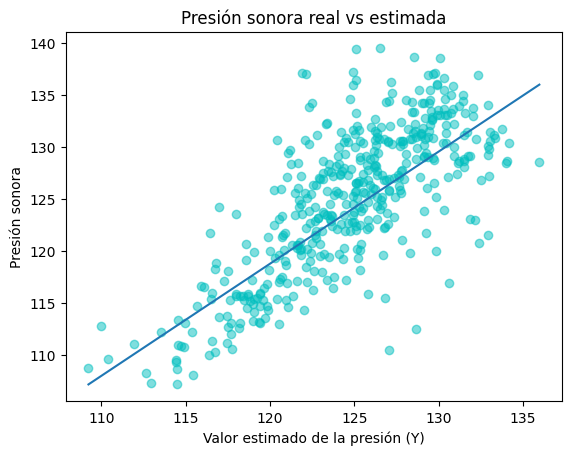

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
# Generamos una gráfica de dispersión
plt.scatter(yhat, ytest, label='Modelo vs Valores Reales', c='c', alpha=0.5)
plt.ylabel("Presión sonora")
plt.xlabel("Valor estimado de la presión (Y)")
plt.title("Presión sonora real vs estimada")

#Creamos la recta
x_line= [min(yhat), max(yhat)]
y_line=[min(ytest), max(yhat)]
plt.plot(x_line, y_line)
plt.show()

En la gráfica podemos observar la relación entre la presión real (eje vertical - y) y la estimada por el modelo (eje horizontal - x), las observaciones las vemos en forma de cada uno de los puntos de color cian, donde la línea de color azul representa la tendencia idonea, por lo que entre más alejados los puntos de la línea mayor es el error de predicción. Como observamos la mayoría de nuestros puntos están cercanos a la línea ideal y solo algunos estan alejados (la diferencia es mayor)